## Install dependencies

In [13]:
pip install matplotlib seaborn yfinance pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Question #1

### Report Class

In [1]:
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr


def true_range(high, low, previous_close=0):
    return max(abs(high - low),
               abs(high - previous_close),
               abs(low - previous_close))


class Reports:

    def __init__(self):
        self.data = None
        self.atr = None
        self.tr = None
        self.retrieve_data()

    # Retrieve data from yahoo finances
    def retrieve_data(self):
        self.data = pdr.get_data_yahoo('SPY')
        return self.data.tail()

    # Calculate simple average in days
    def simple_average(self, days):
        data = self.data.tail(days)
        return str(sum(data["Close"]) / days)

    # Calculate today true range
    def current_true_range(self):
        today_data = self.data.tail()
        high = today_data.loc[:, "High"][-1]
        low = today_data.loc[:, "Low"][-1]
        # previous day
        previous_close = today_data.loc[:, "Close"][-2]
        return true_range(high, low, previous_close)

    # Average true range in days
    def average_true_range(self, num):
        last_num_days = self.data.tail(num + 1)
        # Exlude the last day
        last_num_days = last_num_days.iloc[:-1, :]
        avg = []
        for i in range(last_num_days.shape[0]):
            high = last_num_days.loc[:, "High"][i]
            low = last_num_days.loc[:, "Low"][i]
            previus_one = 0 if i <= 0 else i - 1
            previous_close = last_num_days.loc[:, "Close"][previus_one]
            result = true_range(high, low, previous_close)
            avg.append(result)
            

        return np.mean(avg)

    # Daily % return
    def daily_return(self, days):
        data = self.data.tail(days)
        dif = data.loc[:, "Close"][-1] - data.loc[:, "Close"][0]
        return dif / 100 * data.loc[:, "Close"][0]
    
    
    ##QUESTION 1b
    
    # returns a list of previous days where current TR is greater than SMA in n days
    # Days: n days of sma
    # dif: Difference between TR - SMA
    def optimize(self, days,dif):
        current_tr = self.current_true_range()
        for i in range(1,days):
            avg_tr = self.average_true_range(i)
            ndays = []
            if ((current_tr - avg_tr )> dif ):
                print(i)
          
                
        return ndays
                
                
             
            
            

            
        
        
       
        
       
           
            
            
        
        


### Main

In [2]:
report = Reports()
current_TR = report.current_true_range()
avg_tr = report.average_true_range(5)
daily_return = report.daily_return(5)
sma = report.simple_average(5)



### Running 

/home/laika/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


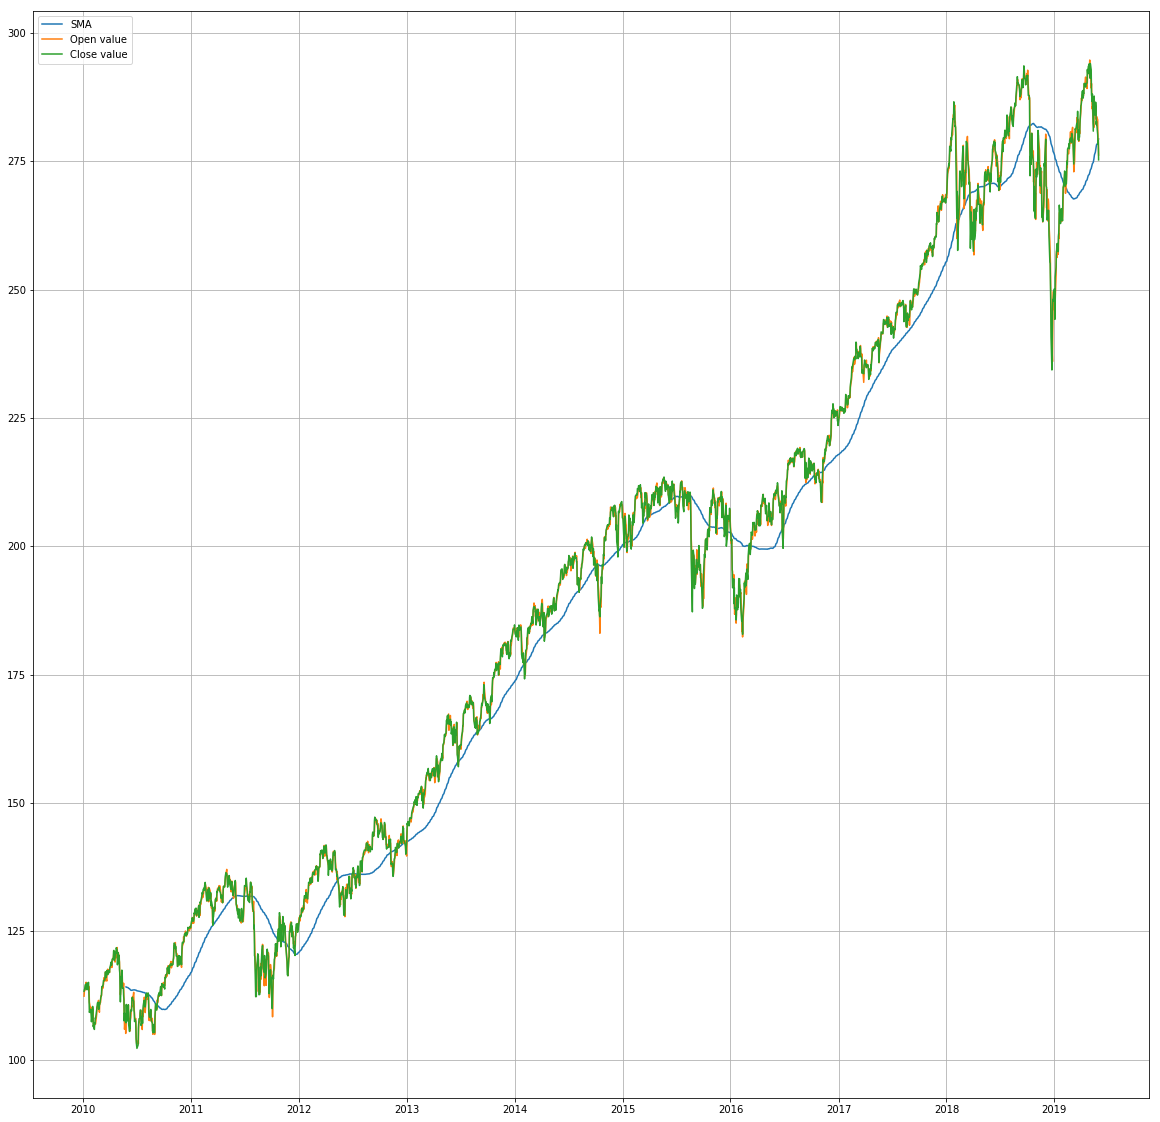

In [3]:
sma_ndays = report.data["Close"].rolling(100).mean()
plt.figure(figsize=(20,20))
plt.grid(True)
plt.plot(sma_ndays,label='SMA')
plt.plot(report.data["Open"],label='Open value')
plt.plot(report.data["Close"],label='Close value')


plt.legend(loc=2)

In [4]:
print("The current TR is {0}".format(current_TR))
print("The avg tr in the last 5 days is {0}".format(avg_tr))
if current_TR < avg_tr:
    ans = "The % of return was {0} and the SMA was {1}".format(daily_return, sma)
else:
    ans = "The current TR is not lower than the Average TR"
print(ans)

The current TR is 3.779998779296875
The avg tr in the last 5 days is 2.88800048828125
The current TR is not lower than the Average TR


<p> One way to optimize </p>

In [5]:
report.optimize(100,1)
#Optimized days

1
2
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


[]

# QUESTION #2

### Cleanner class

In [6]:
import pandas as pd
import datetime as dt
import numpy as np
from collections import Counter

class Cleanner():

    def __init__(self):
        self.data = None
        self.clean()

    # Delete some NaN dates
    def clean(self):
        data = pd.read_excel("test for trigger dates.xlsx")
        data = data.iloc[:, :3]
        data = data.dropna()
        #sns.countplot(data["date start"])
        self.data = data

    # Sort data by month and create a dictionary to store days
    def sort_data(self):
        data = self.data
        result = {}
        for value in data["date start"]:
            month_str = value.strftime("%B")
            if month_str not in result:
                result[month_str] = []
            else:
                result[month_str].append(value.day)
                result[month_str] = list(result[month_str])

        return result
    
    # Show and count how many times a day repeat trought the time
    def show_data(self):
        result = {}
        data = self.sort_data()
        for value in data.keys():
            result[value] = Counter(data[value])
        
        return result
    

            
    
    
 
        
        


In [7]:
cln = Cleanner()

In [8]:
data = cln.show_data()

In [9]:
data

{'January': Counter({28: 4,
          12: 3,
          5: 3,
          13: 1,
          20: 5,
          27: 1,
          19: 2,
          3: 3,
          17: 2,
          4: 3,
          16: 1,
          2: 2,
          9: 2,
          10: 2,
          8: 2,
          30: 3,
          23: 3,
          29: 3,
          11: 1,
          7: 2,
          31: 1,
          25: 1,
          18: 1,
          6: 1,
          26: 1}),
 'February': Counter({13: 3,
          8: 5,
          25: 1,
          14: 2,
          2: 4,
          5: 2,
          22: 1,
          7: 3,
          18: 1,
          17: 3,
          3: 1,
          12: 1,
          16: 1,
          6: 2,
          15: 1,
          11: 4,
          24: 1,
          1: 2,
          23: 1,
          26: 1}),
 'March': Counter({16: 1,
          29: 2,
          4: 3,
          12: 2,
          31: 2,
          2: 1,
          7: 4,
          30: 1,
          20: 4,
          22: 1,
          8: 2,
          21: 3,
          28: 

## VISUALIZE 

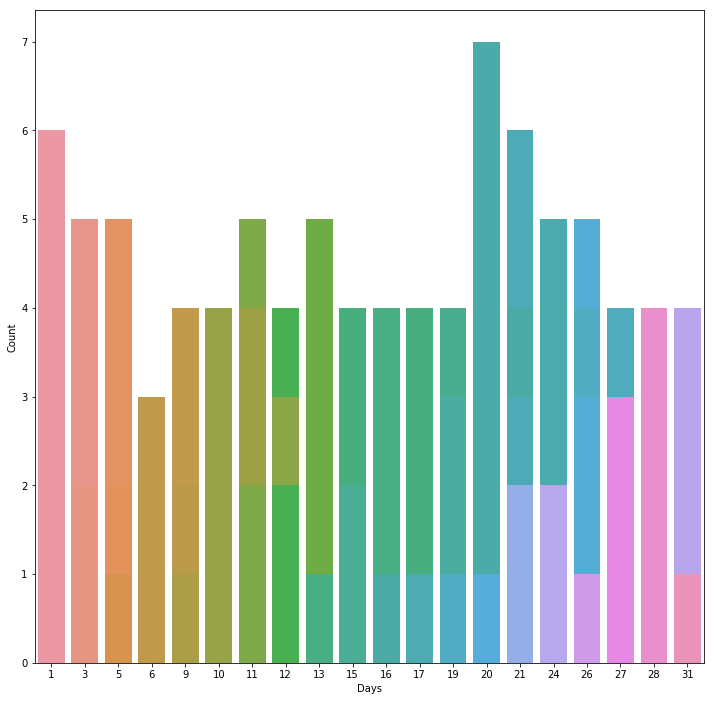

In [10]:
plt.figure(figsize=(12,12))
plt.xlabel("Days")
plt.ylabel("Count")

for key in data.keys():
    values = list(data[key].keys())
    freq = list(data[key].values())
    sns.barplot(x=values,y=freq)